In [3]:
## Import the  pyspark libraries adn create the pyspark session
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Rainfall-predictions-ML-project').getOrCreate()
spark


In [4]:
## Read the train set
df_train_set=spark.read.csv('train.csv',header=True,inferSchema=True)
df_train_set.show()

+---+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+
| id|day|pressure|maxtemp|temparature|mintemp|dewpoint|humidity|cloud|sunshine|winddirection|windspeed|rainfall|
+---+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+
|  0|  1|  1017.4|   21.2|       20.6|   19.9|    19.4|    87.0| 88.0|     1.1|         60.0|     17.2|       1|
|  1|  2|  1019.5|   16.2|       16.9|   15.8|    15.4|    95.0| 91.0|     0.0|         50.0|     21.9|       1|
|  2|  3|  1024.1|   19.4|       16.1|   14.6|     9.3|    75.0| 47.0|     8.3|         70.0|     18.1|       1|
|  3|  4|  1013.4|   18.1|       17.8|   16.9|    16.8|    95.0| 95.0|     0.0|         60.0|     35.6|       1|
|  4|  5|  1021.8|   21.3|       18.4|   15.2|     9.6|    52.0| 45.0|     3.6|         40.0|     24.8|       0|
|  5|  6|  1022.7|   20.6|       18.6|   16.5|    12.5|    79.0| 81.0|     0.0|         20.0|   

In [5]:
## check the data types of each column in dataset
df_train_set.printSchema()

root
 |-- id: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- pressure: double (nullable = true)
 |-- maxtemp: double (nullable = true)
 |-- temparature: double (nullable = true)
 |-- mintemp: double (nullable = true)
 |-- dewpoint: double (nullable = true)
 |-- humidity: double (nullable = true)
 |-- cloud: double (nullable = true)
 |-- sunshine: double (nullable = true)
 |-- winddirection: double (nullable = true)
 |-- windspeed: double (nullable = true)
 |-- rainfall: integer (nullable = true)



In [6]:
## check the column names
df_train_set.columns

['id',
 'day',
 'pressure',
 'maxtemp',
 'temparature',
 'mintemp',
 'dewpoint',
 'humidity',
 'cloud',
 'sunshine',
 'winddirection',
 'windspeed',
 'rainfall']

## Data Preprocessing

In [7]:
## chech the null values
from pyspark.sql.functions import col,isnan, when, count
df_train_set.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_train_set.columns]
   ).show()


+---+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+
| id|day|pressure|maxtemp|temparature|mintemp|dewpoint|humidity|cloud|sunshine|winddirection|windspeed|rainfall|
+---+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+
|  0|  0|       0|      0|          0|      0|       0|       0|    0|       0|            0|        0|       0|
+---+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+



In [8]:
## seperate the independent features and target lables
#independent_features=df_train_set.select(['id','day','pressure','maxtemp','temparature','mintemp','dewpoint','humidity','cloud','sunshine','winddirection','windspeed'])
#target_feature=df_train_set.select(['rainfall'])
#independent_features.show(),target_feature.show()

In [9]:
from pyspark.ml.feature import VectorAssembler
feature_assembler = VectorAssembler(inputCols=['pressure','maxtemp','temparature','mintemp','dewpoint','humidity','cloud','sunshine','winddirection','windspeed'],outputCol='independent_features')
output_features =feature_assembler.transform(df_train_set)
output_features.show()

+---+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+--------------------+
| id|day|pressure|maxtemp|temparature|mintemp|dewpoint|humidity|cloud|sunshine|winddirection|windspeed|rainfall|independent_features|
+---+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+--------------------+
|  0|  1|  1017.4|   21.2|       20.6|   19.9|    19.4|    87.0| 88.0|     1.1|         60.0|     17.2|       1|[1017.4,21.2,20.6...|
|  1|  2|  1019.5|   16.2|       16.9|   15.8|    15.4|    95.0| 91.0|     0.0|         50.0|     21.9|       1|[1019.5,16.2,16.9...|
|  2|  3|  1024.1|   19.4|       16.1|   14.6|     9.3|    75.0| 47.0|     8.3|         70.0|     18.1|       1|[1024.1,19.4,16.1...|
|  3|  4|  1013.4|   18.1|       17.8|   16.9|    16.8|    95.0| 95.0|     0.0|         60.0|     35.6|       1|[1013.4,18.1,17.8...|
|  4|  5|  1021.8|   21.3|       18.4|   15.2|     9.6|    52.

In [10]:
## select the  indepedent features from dataset
output_independent_features=output_features.select('independent_features')
output_independent_features.show()

+--------------------+
|independent_features|
+--------------------+
|[1017.4,21.2,20.6...|
|[1019.5,16.2,16.9...|
|[1024.1,19.4,16.1...|
|[1013.4,18.1,17.8...|
|[1021.8,21.3,18.4...|
|[1022.7,20.6,18.6...|
|[1022.8,19.5,18.4...|
|[1019.7,15.8,13.6...|
|[1017.4,17.6,16.5...|
|[1025.4,16.5,14.4...|
|[1016.8,16.3,15.3...|
|[1012.5,16.2,15.2...|
|[1020.4,15.0,15.5...|
|[1012.5,13.5,12.9...|
|[1018.4,17.8,16.5...|
|[1024.3,15.3,12.9...|
|[1022.5,16.3,13.1...|
|[1034.6,17.5,16.2...|
|[1024.1,16.8,15.8...|
|[1020.2,16.4,14.2...|
+--------------------+
only showing top 20 rows



In [11]:
## scale the dataset usinf standard scaling
from pyspark.ml.feature import StandardScaler
scaler=StandardScaler(inputCol='independent_features', outputCol='scaled_features',withStd=True, withMean=False)
scaler_model=scaler.fit(output_independent_features)
scaled_train_data = scaler_model.transform(output_independent_features)
scaled_train_data.show()

+--------------------+--------------------+
|independent_features|     scaled_features|
+--------------------+--------------------+
|[1017.4,21.2,20.6...|[179.899948764456...|
|[1019.5,16.2,16.9...|[180.271277536233...|
|[1024.1,19.4,16.1...|[181.084664369648...|
|[1013.4,18.1,17.8...|[179.192655865834...|
|[1021.8,21.3,18.4...|[180.677970952940...|
|[1022.7,20.6,18.6...|[180.837111855130...|
|[1022.8,19.5,18.4...|[180.854794177596...|
|[1019.7,15.8,13.6...|[180.306642181164...|
|[1017.4,17.6,16.5...|[179.899948764456...|
|[1025.4,16.5,14.4...|[181.314534561700...|
|[1016.8,16.3,15.3...|[179.793854829663...|
|[1012.5,16.2,15.2...|[179.033514963644...|
|[1020.4,15.0,15.5...|[180.430418438423...|
|[1012.5,13.5,12.9...|[179.033514963644...|
|[1018.4,17.8,16.5...|[180.076771989112...|
|[1024.3,15.3,12.9...|[181.120029014579...|
|[1022.5,16.3,13.1...|[180.801747210199...|
|[1034.6,17.5,16.2...|[182.941308228530...|
|[1024.1,16.8,15.8...|[181.084664369648...|
|[1020.2,16.4,14.2...|[180.39505

In [12]:
scaled_train_preprocessed_data=scaled_train_data.select('scaled_features')
scaled_train_preprocessed_data.show()

+--------------------+
|     scaled_features|
+--------------------+
|[179.899948764456...|
|[180.271277536233...|
|[181.084664369648...|
|[179.192655865834...|
|[180.677970952940...|
|[180.837111855130...|
|[180.854794177596...|
|[180.306642181164...|
|[179.899948764456...|
|[181.314534561700...|
|[179.793854829663...|
|[179.033514963644...|
|[180.430418438423...|
|[179.033514963644...|
|[180.076771989112...|
|[181.120029014579...|
|[180.801747210199...|
|[182.941308228530...|
|[181.084664369648...|
|[180.395053793491...|
+--------------------+
only showing top 20 rows



## Explotary Data Analysis

In [13]:
scaled_train_preprocessed_data.show()

+--------------------+
|     scaled_features|
+--------------------+
|[179.899948764456...|
|[180.271277536233...|
|[181.084664369648...|
|[179.192655865834...|
|[180.677970952940...|
|[180.837111855130...|
|[180.854794177596...|
|[180.306642181164...|
|[179.899948764456...|
|[181.314534561700...|
|[179.793854829663...|
|[179.033514963644...|
|[180.430418438423...|
|[179.033514963644...|
|[180.076771989112...|
|[181.120029014579...|
|[180.801747210199...|
|[182.941308228530...|
|[181.084664369648...|
|[180.395053793491...|
+--------------------+
only showing top 20 rows



In [14]:
## convert to pandas dataframe
pandas_df=scaled_train_preprocessed_data.toPandas()
pandas_df.head()



,scaled_features
0,"[179.89994876445667, 3.7493387549254282, 3.944..."
1,"[180.27127753623313, 2.865060746688299, 3.2360..."
2,"[181.08466436964818, 3.4309986719600616, 3.082..."
3,"[179.19265586583487, 3.2010863898184083, 3.408..."
4,"[180.67797095294065, 3.767024315090171, 3.5232..."


In [22]:
pandas_df.shape

(2190, 1)

In [25]:
df_train_set_pandas = df_train_set.toPandas()
df_train_set_pandas.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


TypeError: 'Column' object is not callable

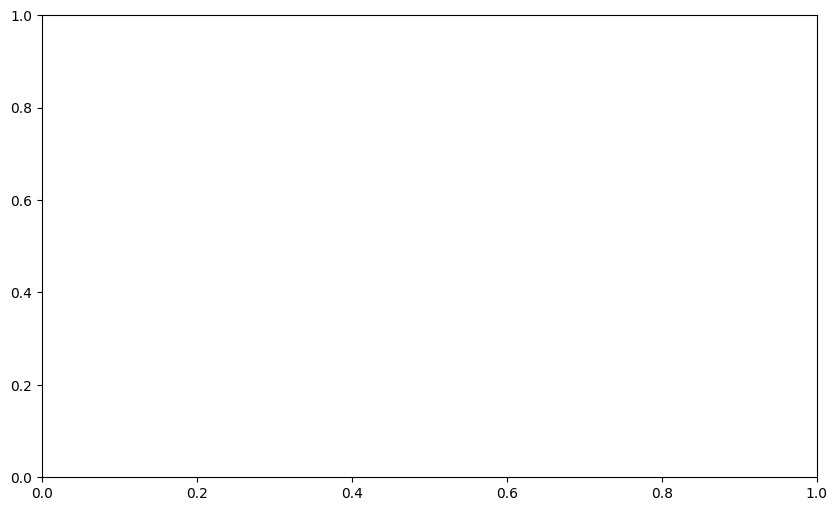

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(pandas_df["scaled_features"], df_train_set["rainfall"],color="blue")
plt.xlabel("scaled_features")
plt.ylabel("rainfall")
plt.title("scaled_features vs rainfall")
plt.show()